<a href="https://colab.research.google.com/github/matheusvazdata/dados-lab/blob/main/Working_with_structured_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧩 Trabalhando com Dados Estruturados (Structured Data)

## 🔍 Exemplo Real com API: OMDb (Open Movie Database)

### 🔑 Como obter a chave de acesso da OMDb API

Para utilizar a API da OMDb (Open Movie Database) e buscar informações sobre filmes, é necessário gerar uma **chave de API gratuita**.

#### Passo a passo:

1. Acesse o site oficial da OMDb: [https://www.omdbapi.com/apikey.aspx](https://www.omdbapi.com/apikey.aspx)
2. Preencha os campos com seu nome e e-mail.
3. Escolha a opção **Free** (gratuita).
4. Clique em **Submit**.
5. Após o envio, você receberá a chave de API por e-mail.

> ⚠️ **Importante:** guarde sua chave com segurança e substitua `"SUA_CHAVE"` no código pela sua chave real.

Sem essa chave, as requisições para a API não retornarão dados válidos.

##### 📦 Etapa 1: Coletando Dados Estruturados da API OMDb

In [1]:
!pip install python-dotenv

In [2]:
import os
from dotenv import load_dotenv

load_dotenv()
chave_api = os.getenv('OMDB_API_KEY') # Este processo foi usado para importar a chave da API de outro arquivo

In [3]:
import requests
import pandas as pd

# Função para buscar dados de filmes via API
def buscar_dados_filme(titulo, chave_api):
    url = f"http://www.omdbapi.com/?t={titulo}&apikey={chave_api}"
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        return None

In [4]:
# Lista de filmes para teste
filmes = ["The Matrix", "Inception", "Interstellar", "Forrest Gump"]

# Sua chave de API OMDb
# chave_api = "SUA_CHAVE"  # 🔒 Esta linha está comentada porque a chave está sendo carregada de forma segura, via variável de ambiente
#                         # Recomendo não deixar a chave exposta no código para evitar vazamento no GitHub

# Coletando os dados
dados_filmes = []
for filme in filmes:
    dados = buscar_dados_filme(filme, chave_api)
    if dados and dados["Response"] == "True":
        dados_filmes.append(dados)

In [5]:
# Convertendo para DataFrame
df_filmes = pd.DataFrame(dados_filmes)

# Visualizando as colunas disponíveis
print(df_filmes.columns.tolist())

['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Poster', 'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'imdbID', 'Type', 'DVD', 'BoxOffice', 'Production', 'Website', 'Response']


In [6]:
# Visualizando o dataframe
df_filmes

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,...,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response
0,The Matrix,1999,R,31 Mar 1999,136 min,"Action, Sci-Fi","Lana Wachowski, Lilly Wachowski","Lilly Wachowski, Lana Wachowski","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",When a beautiful stranger leads computer hacke...,...,73,8.7,"2,124,695",tt0133093,movie,N/A,"$172,076,928",N/A,N/A,True
1,Inception,2010,PG-13,16 Jul 2010,148 min,"Action, Adventure, Sci-Fi",Christopher Nolan,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",A thief who steals corporate secrets through t...,...,74,8.8,"2,658,716",tt1375666,movie,N/A,"$292,587,330",N/A,N/A,True
2,Interstellar,2014,PG-13,07 Nov 2014,169 min,"Adventure, Drama, Sci-Fi",Christopher Nolan,"Jonathan Nolan, Christopher Nolan","Matthew McConaughey, Anne Hathaway, Jessica Ch...",When Earth becomes uninhabitable in the future...,...,74,8.7,"2,301,429",tt0816692,movie,N/A,"$203,227,580",N/A,N/A,True
3,Forrest Gump,1994,PG-13,06 Jul 1994,142 min,"Drama, Romance",Robert Zemeckis,"Winston Groom, Eric Roth","Tom Hanks, Robin Wright, Gary Sinise",The history of the United States from the 1950...,...,82,8.8,"2,342,884",tt0109830,movie,N/A,"$330,455,270",N/A,N/A,True


##### 🔧 Etapa 2: Selecionando e Formatando Colunas Relevantes

In [7]:
# Selecionando apenas as colunas que nos interessam
df_limpo = df_filmes[["Title", "Year", "Director", "Genre", "imdbRating", "Runtime"]]

In [8]:
# Convertendo tipos de dados
df_limpo.loc[:, "Year"] = pd.to_numeric(df_limpo["Year"], errors="coerce")
df_limpo.loc[:, "imdbRating"] = pd.to_numeric(df_limpo["imdbRating"], errors="coerce")
df_limpo.loc[:, "Runtime"] = df_limpo["Runtime"].str.replace(" min", "").astype(float)

print(df_limpo.dtypes)

Title         object
Year          object
Director      object
Genre         object
imdbRating    object
Runtime       object
dtype: object


In [9]:
# Visualizando se há valores nulos
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Title       4 non-null      object
 1   Year        4 non-null      object
 2   Director    4 non-null      object
 3   Genre       4 non-null      object
 4   imdbRating  4 non-null      object
 5   Runtime     4 non-null      object
dtypes: object(6)
memory usage: 324.0+ bytes


##### 📊 Etapa 3: Análise Simples dos Dados

In [10]:
# Estatísticas descritivas
display(df_limpo.describe())

,Title,Year,Director,Genre,imdbRating,Runtime
count,4,4,4,4,4.0,4.0
unique,4,4,3,4,2.0,4.0
top,The Matrix,1999,Christopher Nolan,"Action, Sci-Fi",8.7,136.0
freq,1,1,2,1,2.0,1.0


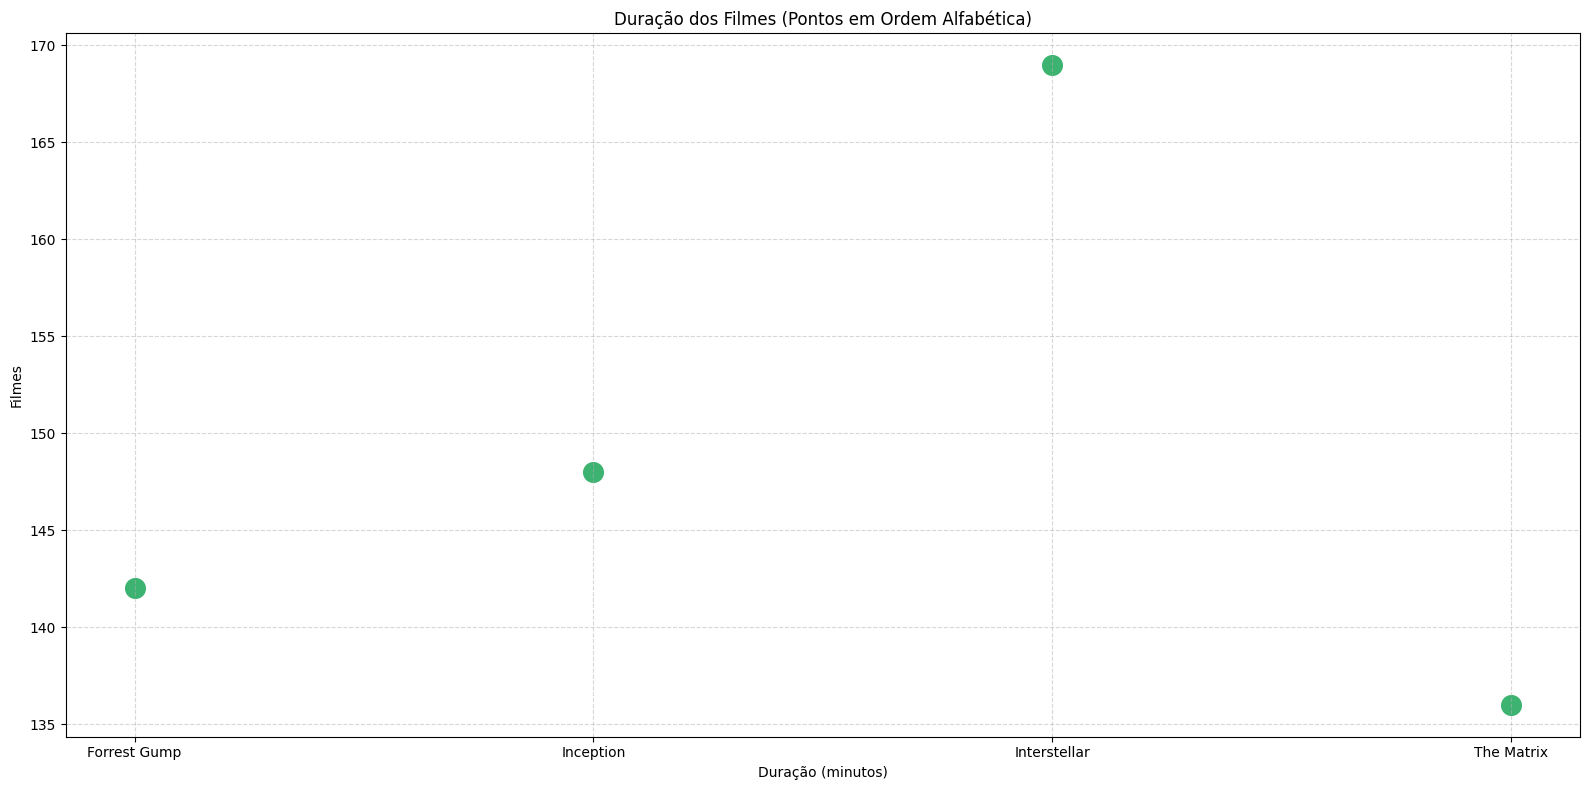

In [11]:
# Visualização gráfica
import matplotlib.pyplot as plt

# Ordenando os filmes em ordem alfabética
df_runtime = df_limpo.sort_values(by="Title")

# Criando o gráfico de pontos com plt.scatter()
plt.figure(figsize=(16, 8))
plt.scatter(
    x=df_runtime["Title"],
    y=df_runtime["Runtime"],
    s=200,                      # <-- TAMANHO DOS PONTOS AQUI
    color='mediumseagreen'
)

# Títulos e eixos
plt.ylabel("Filmes")
plt.xlabel("Duração (minutos)")
plt.title("Duração dos Filmes (Pontos em Ordem Alfabética)")
plt.grid(True, linestyle='--', alpha=0.5)

# Exibir o gráfico
plt.tight_layout()
plt.show()

##### 💾 Etapa 4: Salvando os Dados Estruturados

In [12]:
# Salvando em CSV
df_limpo.to_csv("dados_filmes_estruturados.csv", index=False)

### 🔄 Possibilidades para Engenharia de Dados

Um **Engenheiro de Dados Júnior** pode:

- Automatizar a coleta de dados de APIs estruturadas (como **OMDb**, **IBGE**, **APIs financeiras**, etc).
- Armazenar esses dados em bases locais (como SQLite) ou em **Data Warehouses**.
- Fornecer dados limpos para o time de **BI** ou para **dashboards analíticos**.

### ✅ Resumo das Boas Práticas com Structured Data

| Ação                       | Ferramenta                                 |
|----------------------------|--------------------------------------------|
| **Extração**               | `requests.get()`                           |
| **Conversão JSON → Tabela**| `pd.DataFrame()`                           |
| **Limpeza de dados**       | `pandas` (`astype`, `replace`, `dropna`)   |
| **Armazenamento**          | `.to_csv()`, `.to_sql()`                   |
| **Visualização**           | `matplotlib`, `seaborn`, `plotly`          |

### 🚀 Conclusão

Ao trabalhar com **structured data**, o Engenheiro de Dados Júnior deve saber:

- Identificar o **formato do dado** (JSON, CSV, SQL).
- **Estruturar e limpar** esses dados utilizando o Pandas.
- **Integrar APIs** ao seu pipeline de dados para automação e análise.